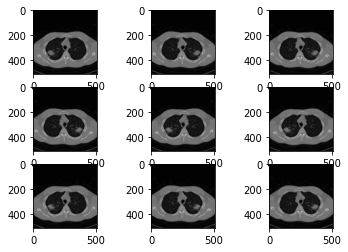

In [5]:
from numpy import expand_dims
from keras.preprocessing import image
from matplotlib import pyplot
import tensorflow as tf

img = tf.keras.utils.load_img('E:\GSoC\ct_imaging\chest-ct\chest\ID_0057_AGE_0049_CONTRAST_0_CT.jpg')

dataImage = tf.keras.utils.img_to_array(img)

imageNew = expand_dims(dataImage, 0)

imageDataGen = image.ImageDataGenerator(horizontal_flip=True)

iterator = imageDataGen.flow(imageNew, batch_size=1)

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = iterator.next()
	img = batch[0].astype('uint8')
	pyplot.imshow(img)

pyplot.show()

In [7]:
import rotatedicom as rd

rd.rotate_dicom('E:\GSoC\ct_imaging\chest-ct\chest\ID_0057_AGE_0049_CONTRAST_0_CT.jpg', 'E:\GSoC\ct_imaging', 90)

AttributeError: module 'rotatedicom' has no attribute 'rotate_dicom'

In [11]:
import dicom2nifti

dicom2nifti.dicom_series_to_nifti('E:\\GSoC\\ct_imaging\\archive\\dicom_dir', 'E:\\GSoC\\ct_imaging\\temp', reorient_nifti=True)

Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Image orientations not consistent through all slices
---------------------------------------------------------
[-1.  0.  0.] [1. 0. 0.]
[ 0. -1.  0.] [0. 1. 0.]
---------------------------------------------------------


ConversionValidationError: IMAGE_ORIENTATION_INCONSISTENT

In [13]:
# SimpleITK to check orientation of DICOM image
import SimpleITK as sitk

series_IDs = sitk.ImageSeriesReader.GetGDCMSeriesIDs('E:\\GSoC\\ct_imaging\\archive\\dicom_dir')
series_IDs

('1.3.6.1.4.1.14519.5.2.1.3023.4012.102289758600639081883682341599',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.111970507245102440072981773069',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.154470741269083988898569715734',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.251486101984782457779149100338',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.281222452204153314922270968637',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.297267439816180432188742253053',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.513523794062613324810980652054',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.648531603410109839170055154074',
 '1.3.6.1.4.1.14519.5.2.1.3023.4012.695837418985624676340861607694',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.153444090734536905415278769671',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.175016803370372621275285549100',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.185965196167856618864777448062',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.200234714530375524999580843628',
 '1.3.6.1.4.1.14519.5.2.1.6450.4012.249320450296411760831322037482',
 '1.3.6.1.4.1.14519.5.2.1.6450.401

In [15]:
data_directory='E:\\GSoC\\ct_imaging\\archive\\dicom_dir'
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_IDs[0])
series_file_names

('E:\\GSoC\\ct_imaging\\archive\\dicom_dir\\ID_0078_AGE_0066_CONTRAST_0_CT.dcm',)

In [16]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)
series_reader.LoadPrivateTagsOn()
image3D=series_reader.Execute()
size = image3D.GetSize()

In [17]:
size

(512, 512, 1)

In [19]:
reoriented = sitk.DICOMOrient(img, 'LPS')

TypeError: in method 'DICOMOrient', argument 1 of type 'itk::simple::Image const &'